In [45]:
# Install liac-arff
!pip install liac-arff
!pip install butter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for butter: filename=butter-0.13.1-cp39-cp39-linux_x86_64.whl size=184788 sha256=2f3afc8db0267fe5236eee3e3e440381ff4a6519afde5e2b6f78abad65a33fb6
  Stored in directory: /root/.cache/pip/wheels/50/09/06/defec606641141d8c77616ad476e218a64a99d0d8fbb69678c
Successfully built butter


library yang dibutuhkan

In [128]:
import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Membaca file ARFF

In [145]:
# Membaca file ARFF
with open('data_1600_accel_phone.arff') as file:
    data = arff.load(file)

Membuat data menjadi type datafram dan merapikan juga

In [146]:
atr = data['attributes']
data_2 = data['data']
newAtr = []
for i in range(len(atr)):
  newAtr.append(atr[i][0])

In [148]:
df = pd.DataFrame(data_2, columns=newAtr)
df

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.235,0.470,0.275,0.020,0.000,0.0,0.0,0.0,0.0,...,0.486106,0.479859,-0.550668,0.049864,0.121354,-0.251024,0.164468,-0.110722,10.05180,1600
1,A,0.275,0.440,0.270,0.015,0.000,0.0,0.0,0.0,0.0,...,0.479571,0.473409,-0.633171,0.072129,0.161492,-0.386416,0.215680,-0.034375,10.11710,1600
2,A,0.320,0.430,0.245,0.000,0.005,0.0,0.0,0.0,0.0,...,0.483005,0.476798,-0.659493,0.087043,0.162157,-0.325151,0.272380,-0.077274,9.98384,1600
3,A,0.315,0.495,0.185,0.005,0.000,0.0,0.0,0.0,0.0,...,0.480711,0.474534,-0.712081,0.003810,0.210015,-0.364285,0.203131,0.015328,10.10600,1600
4,A,0.215,0.455,0.325,0.005,0.000,0.0,0.0,0.0,0.0,...,0.468836,0.462811,-0.534933,0.047553,0.275833,-0.216423,0.238500,-0.009870,10.05210,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,S,0.015,0.985,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.090424,0.089262,-0.974784,-0.033293,0.170732,0.263453,0.616781,-0.007176,9.83913,1600
317,S,0.015,0.985,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.057153,0.056418,-0.982214,0.288177,-0.173124,-0.089497,0.639162,-0.046877,9.85156,1600
318,S,0.020,0.980,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.186058,0.183667,-0.947857,-0.729575,0.705961,0.418560,-0.221095,-0.565708,9.79893,1600
319,S,0.015,0.985,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.111727,0.110291,-0.981232,-0.136461,0.225444,0.356703,0.472068,-0.217180,9.83038,1600


Melabel activity agar bisa melakukan MVA

In [132]:
le = LabelEncoder()
le.fit(df['ACTIVITY'])
df['ACTIVITY'] = le.transform(df['ACTIVITY'])

Fungsi MVA

In [133]:
def moving_average(data, n):
    return data.rolling(window=n).mean()

# Terapkan filter pada dataset WISDM
df_filtered = df.apply(moving_average, args=(5,))

Untuk membuat plot pada semua kolom kecuali kolom ACTIVITY

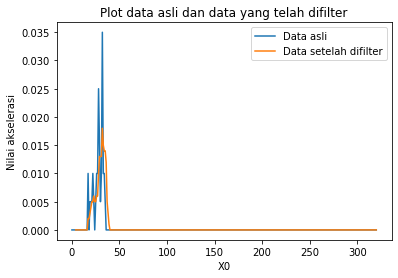

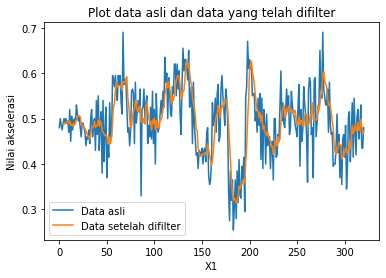

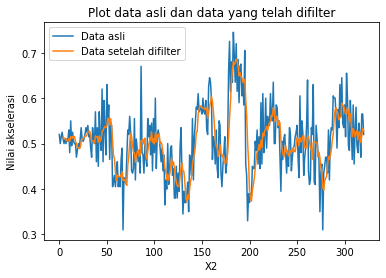

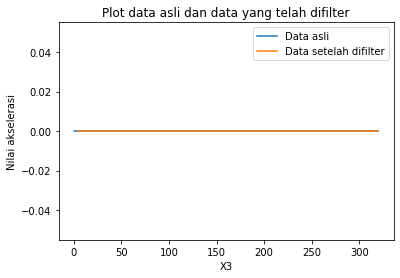

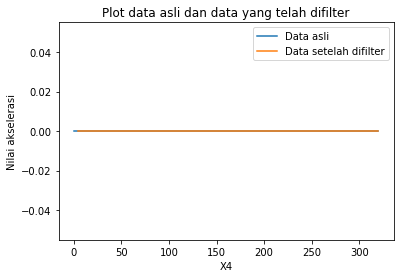

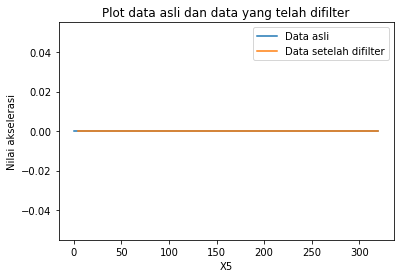

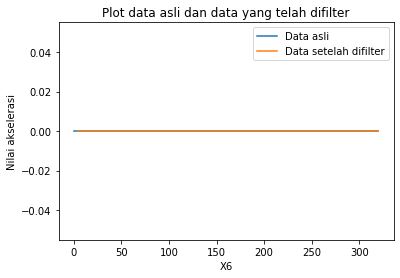

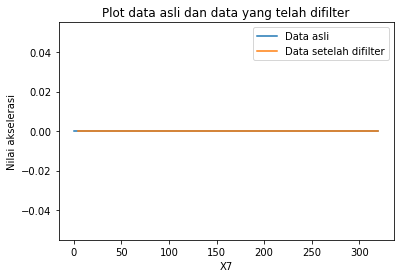

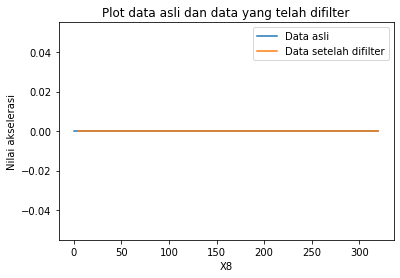

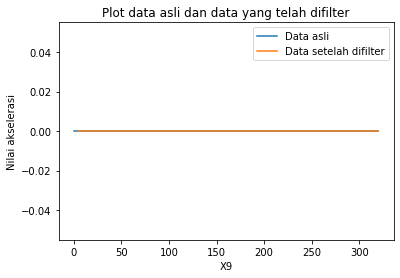

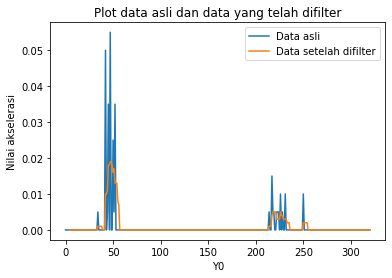

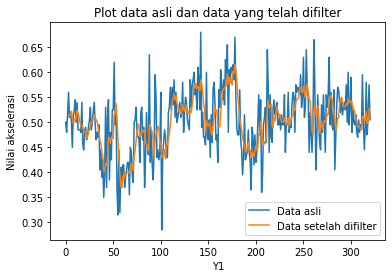

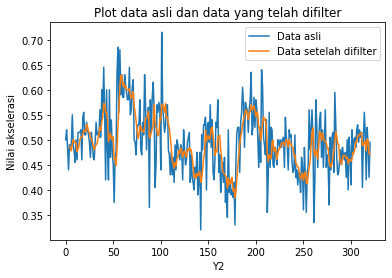

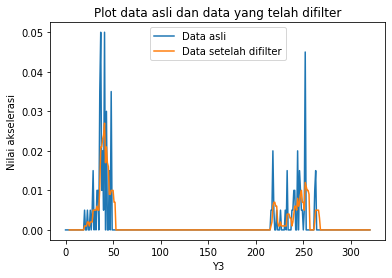

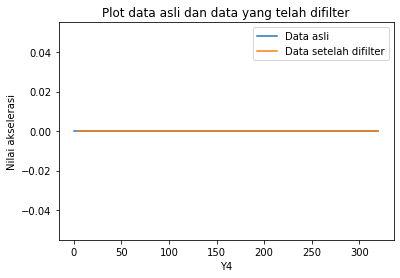

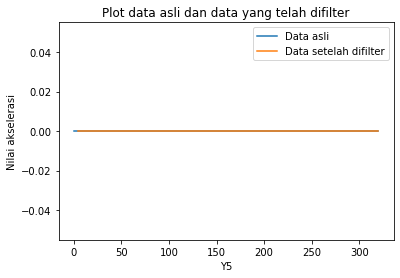

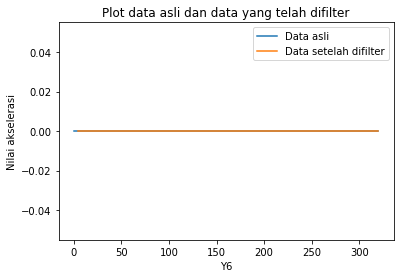

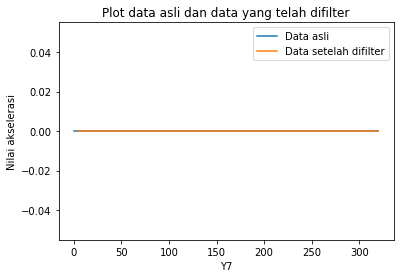

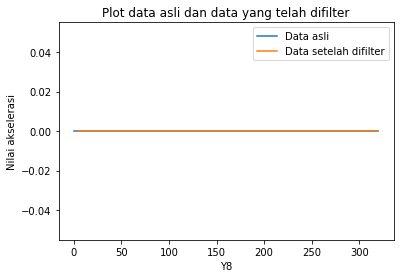

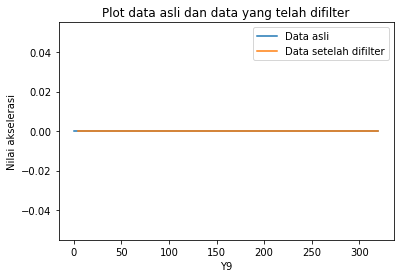

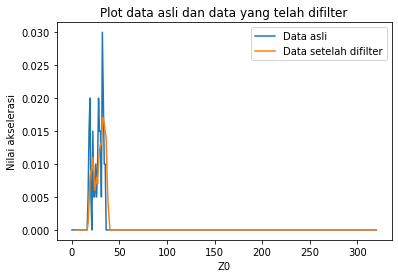

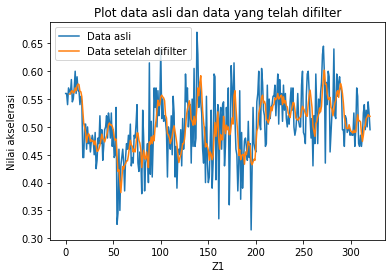

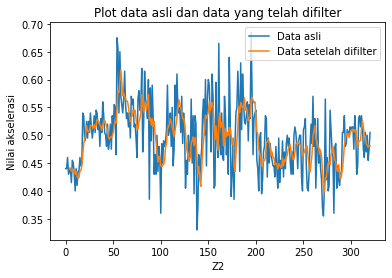

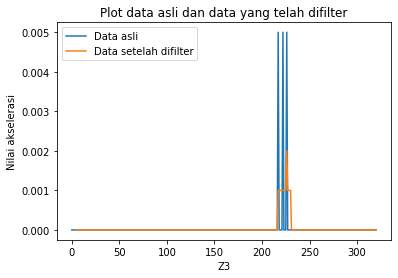

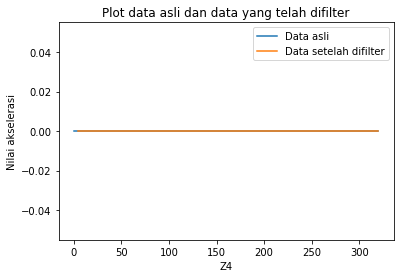

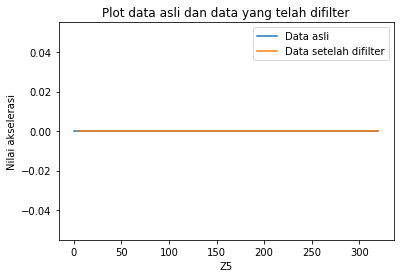

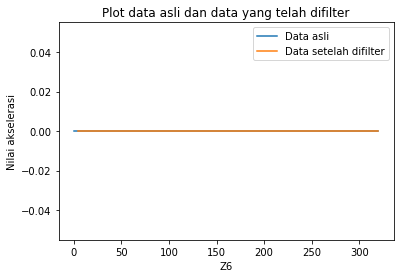

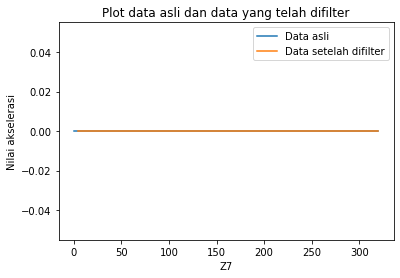

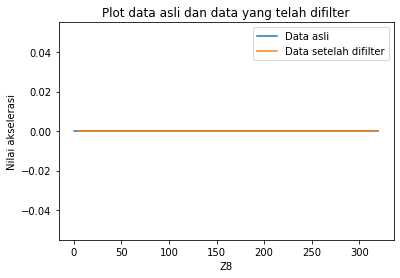

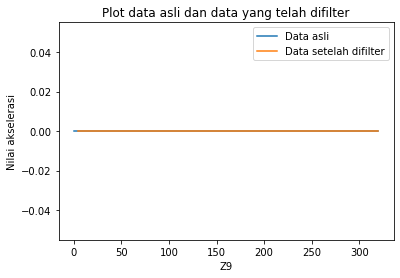

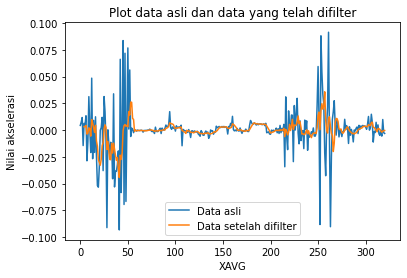

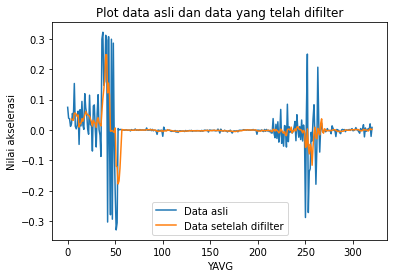

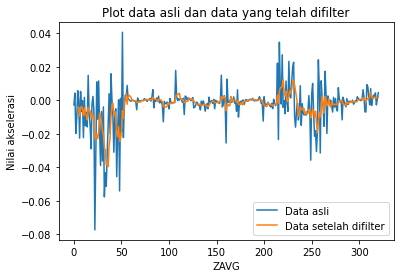

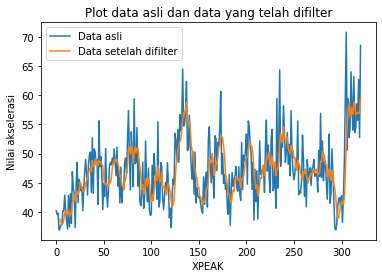

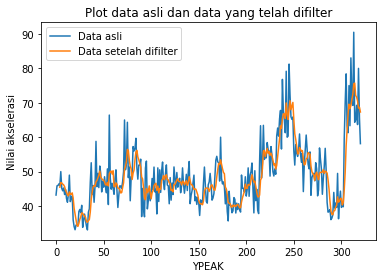

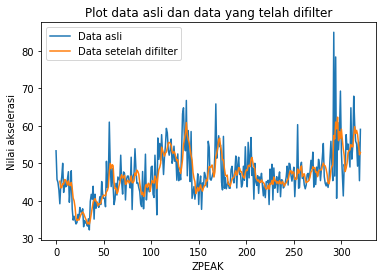

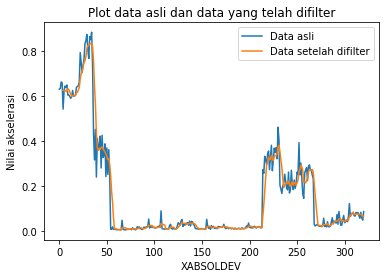

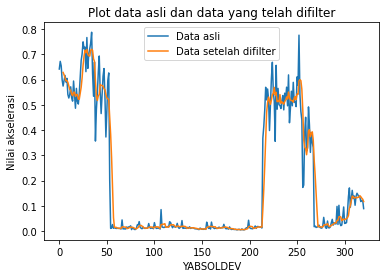

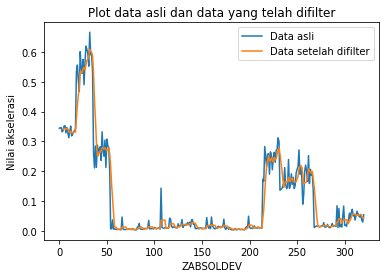

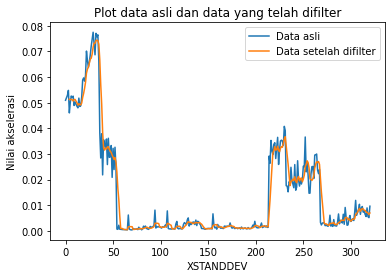

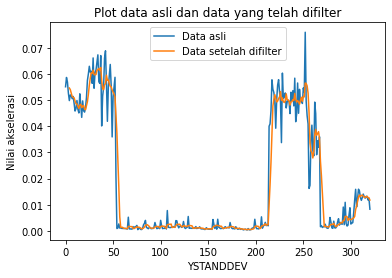

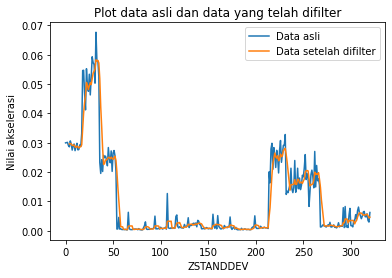

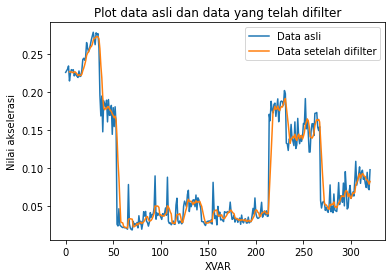

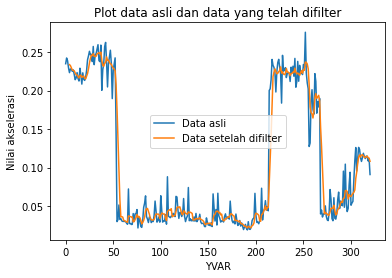

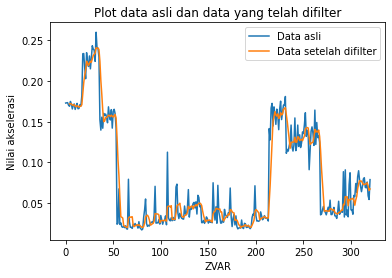

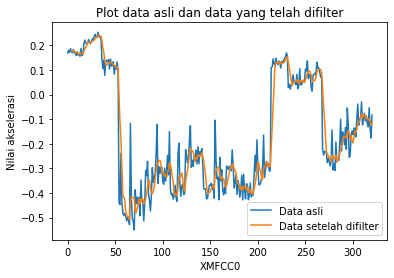

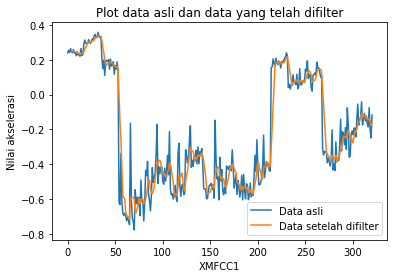

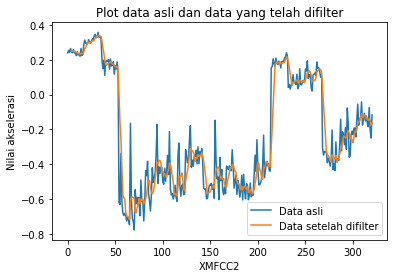

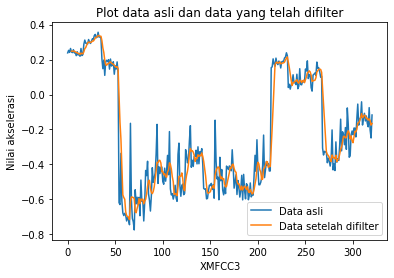

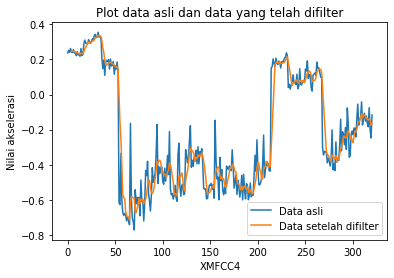

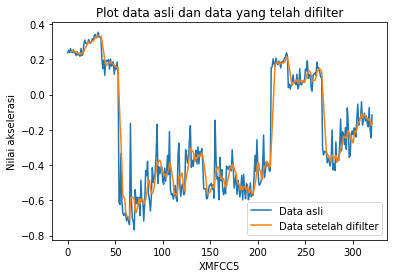

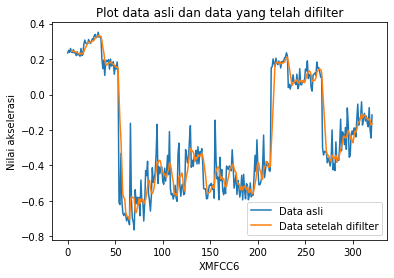

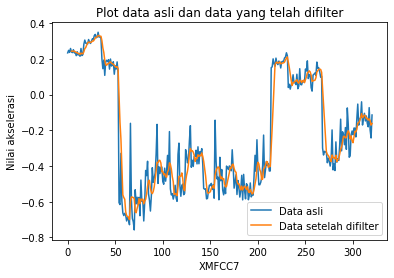

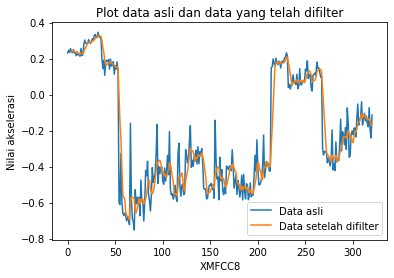

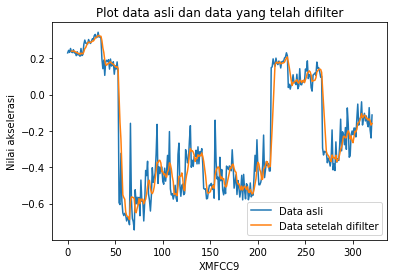

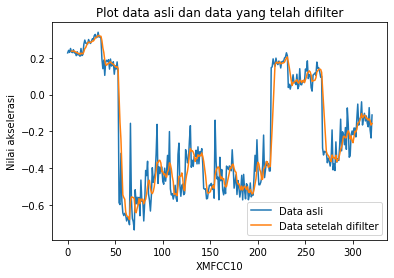

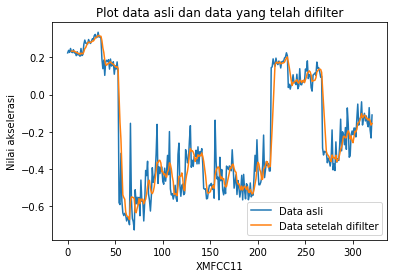

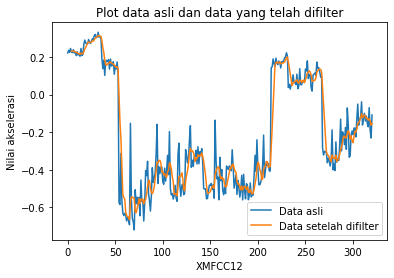

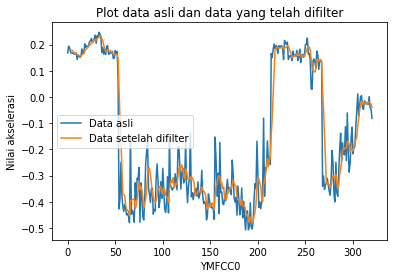

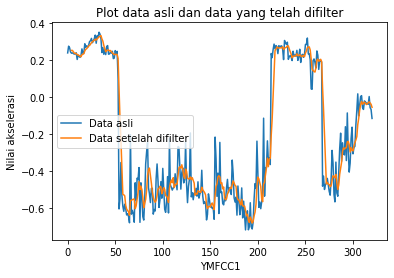

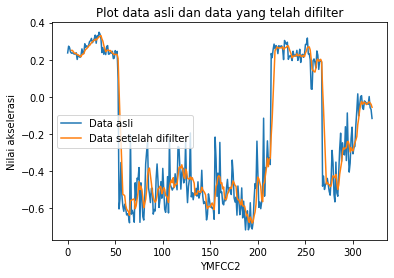

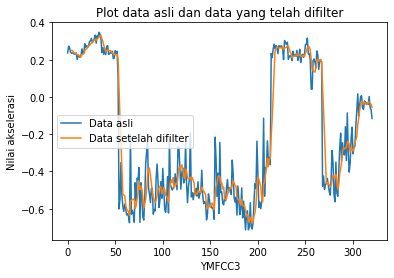

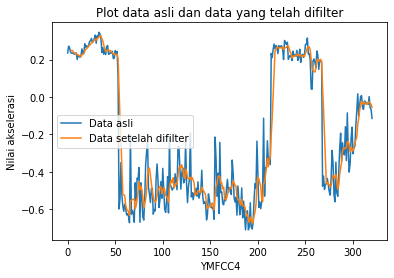

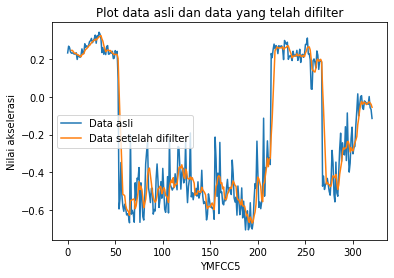

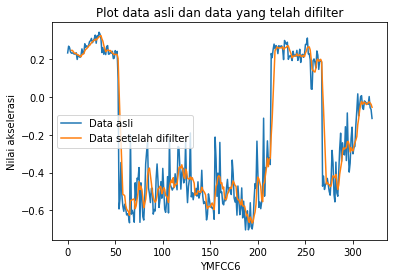

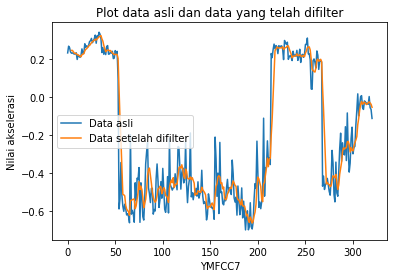

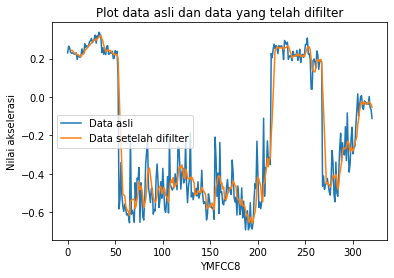

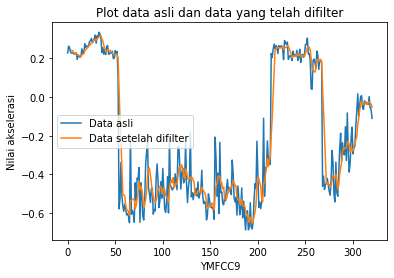

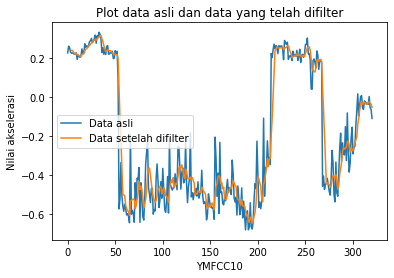

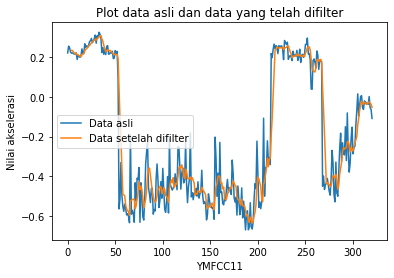

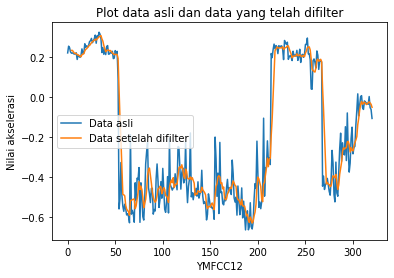

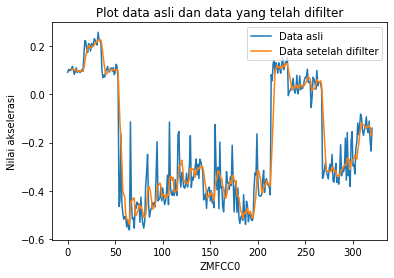

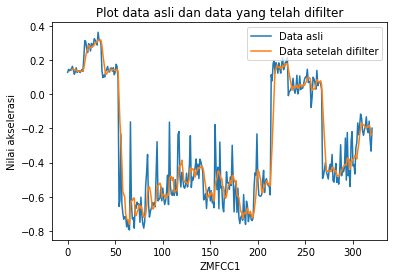

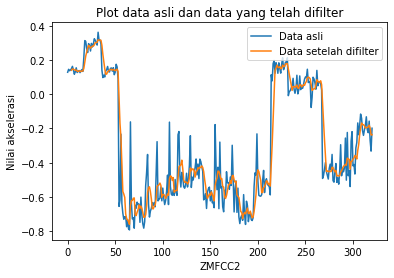

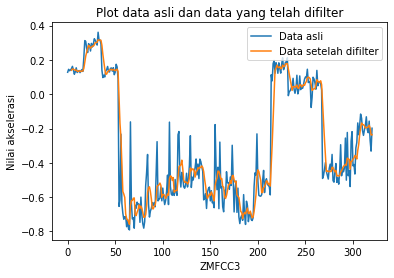

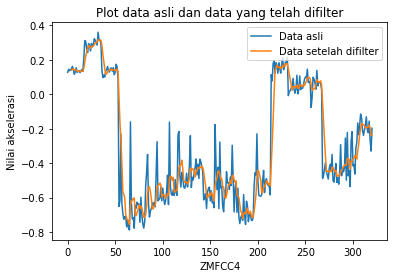

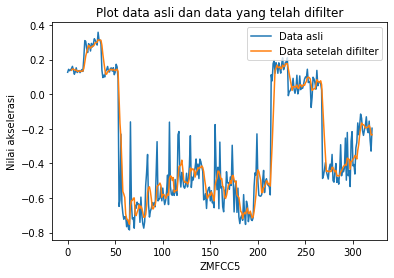

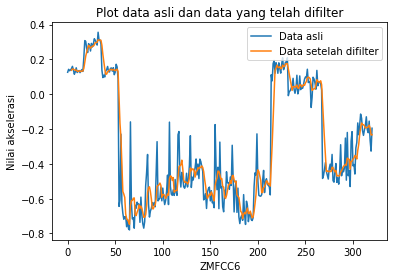

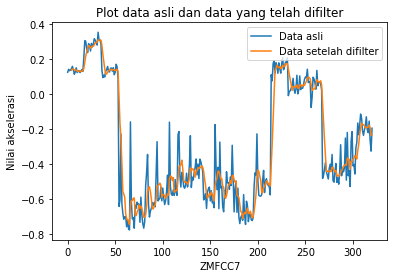

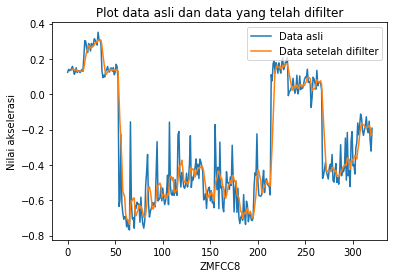

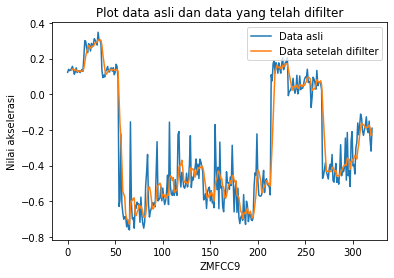

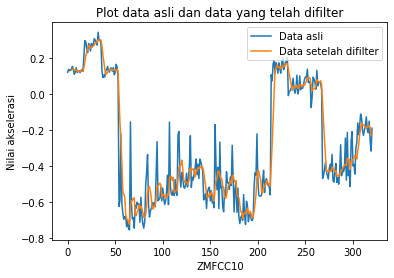

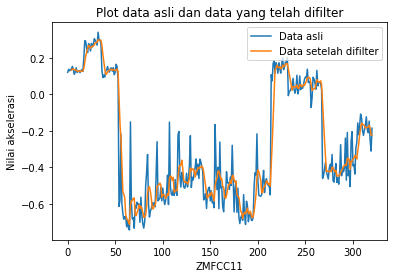

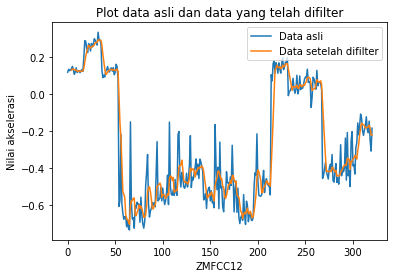

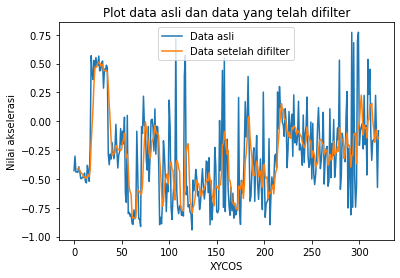

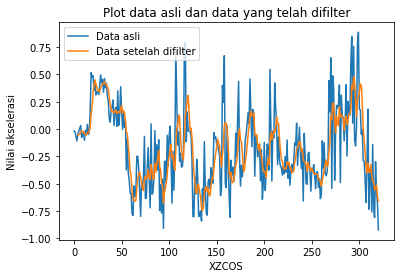

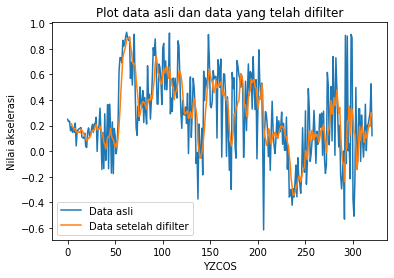

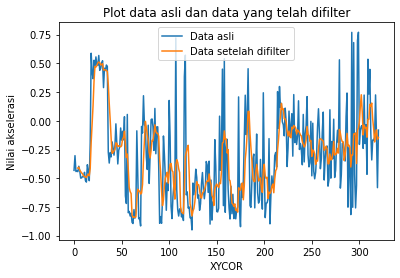

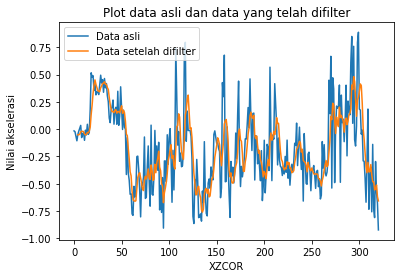

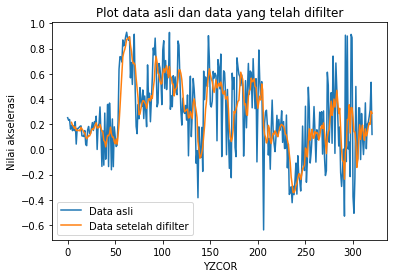

KeyboardInterrupt: ignored

In [134]:
for i in df:
  if i != 'ACTIVITY':
    plt.plot(df[i], label='Data asli')
    plt.plot(df_filtered[i], label='Data setelah difilter')

    plt.legend()
    plt.title('Plot data asli dan data yang telah difilter')
    plt.xlabel(i)
    plt.ylabel('Nilai akselerasi')

    plt.show()

Mengambil dataset yang hanya mengandung activity jogging/B saja

In [135]:
df_B = df.loc[df['ACTIVITY'] == 1]
df_B

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
17,1,0.010,0.490,0.500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.202227,0.199628,-0.191653,0.183578,0.101523,-0.191638,0.182762,0.101681,0.95756,1600
18,1,0.000,0.530,0.470,0.0,0.0,0.0,0.0,0.0,0.0,...,0.294193,0.290412,0.568208,0.516754,0.140585,0.588033,0.515788,0.149051,1.15993,1600
19,1,0.005,0.510,0.485,0.0,0.0,0.0,0.0,0.0,0.0,...,0.289497,0.285777,0.416214,0.476854,0.036551,0.426721,0.477603,0.037140,1.14284,1600
20,1,0.005,0.495,0.500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250060,0.246847,0.360876,0.488775,0.029609,0.365835,0.489347,0.029416,1.10196,1600
21,1,0.005,0.505,0.490,0.0,0.0,0.0,0.0,0.0,0.0,...,0.228704,0.225765,0.526816,0.354106,0.154148,0.526832,0.354123,0.154236,1.09915,1600
22,1,0.010,0.480,0.510,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277598,0.274031,0.463556,0.414492,0.182475,0.463685,0.416753,0.181524,1.30877,1600
23,1,0.005,0.460,0.535,0.0,0.0,0.0,0.0,0.0,0.0,...,0.269024,0.265567,0.552344,0.312948,0.120220,0.556043,0.313831,0.127698,1.29916,1600
24,1,0.000,0.490,0.510,0.0,0.0,0.0,0.0,0.0,0.0,...,0.237156,0.234108,0.485884,0.341956,0.124807,0.487283,0.342991,0.124511,1.27684,1600
25,1,0.005,0.490,0.505,0.0,0.0,0.0,0.0,0.0,0.0,...,0.278893,0.275310,0.482301,0.337524,0.170639,0.482084,0.338254,0.170926,1.34819,1600
26,1,0.010,0.480,0.510,0.0,0.0,0.0,0.0,0.0,0.0,...,0.259432,0.256098,0.565169,0.316882,0.210182,0.568502,0.316667,0.212321,1.31514,1600


Memfilter dengan 3 windows size yang berbeda yaitu (5,3,8)

In [126]:
#memfilter dengan ukuran 5
df_filtered_5B = df_B.apply(moving_average, args=(5,))
#memfilter dengan ukuran 3
df_filtered_3B = df_B.apply(moving_average, args=(3,))
#memfilter dengan ukuran 7
df_filtered_8B = df_B.apply(moving_average, args=(8,))

Membuat plot dengan 3 windows size tadi

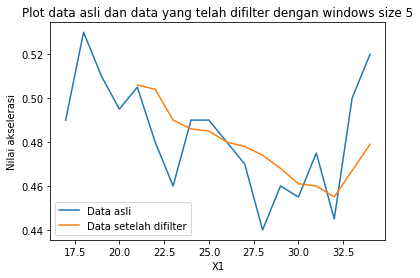

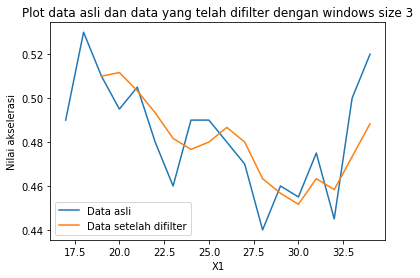

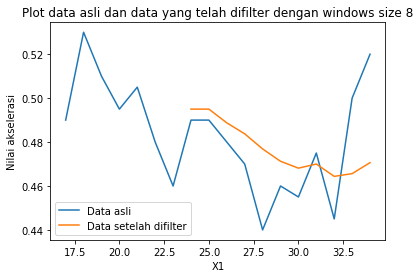

In [136]:
#plot pada size 5 pada kolom x1
plt.plot(df_B['X1'], label='Data asli')
plt.plot(df_filtered_5B['X1'], label='Data setelah difilter')

plt.legend()
plt.title('Plot data asli dan data yang telah difilter dengan windows size 5')
plt.xlabel('X1')
plt.ylabel('Nilai akselerasi')
plt.show()

#plot pada size 3
plt.plot(df_B['X1'], label='Data asli')
plt.plot(df_filtered_3B['X1'], label='Data setelah difilter')

plt.legend()
plt.title('Plot data asli dan data yang telah difilter dengan windows size 3')
plt.xlabel('X1')
plt.ylabel('Nilai akselerasi')
plt.show()

#plot pada size 8
plt.plot(df_B['X1'], label='Data asli')
plt.plot(df_filtered_8B['X1'], label='Data setelah difilter')

plt.legend()
plt.title('Plot data asli dan data yang telah difilter dengan windows size 8')
plt.xlabel('X1')
plt.ylabel('Nilai akselerasi')
plt.show()

memfilter dengan 3 size windows yang berbeda ke semua dataset

In [140]:
#windows size 5
df_5filtered = df.apply(moving_average, args=(5,))
#windows size 3
df_3filtered = df.apply(moving_average, args=(3,))
#windows size 8
df_8filtered = df.apply(moving_average, args=(8,))

Hasil plot MVA filter pada semua dataset

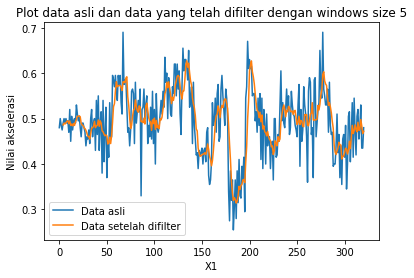

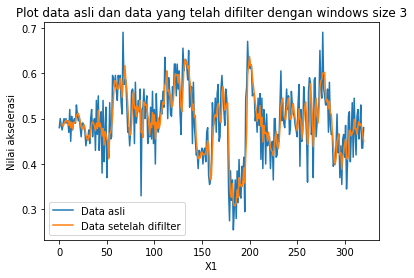

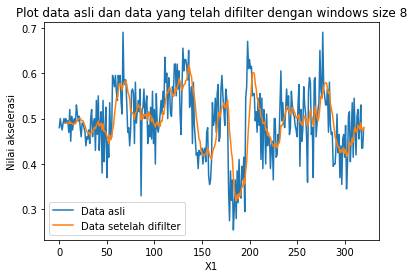

In [141]:
#plot pada size 5 pada kolom x1
plt.plot(df['X1'], label='Data asli')
plt.plot(df_5filtered['X1'], label='Data setelah difilter')

plt.legend()
plt.title('Plot data asli dan data yang telah difilter dengan windows size 5')
plt.xlabel('X1')
plt.ylabel('Nilai akselerasi')
plt.show()

#plot pada size 3
plt.plot(df['X1'], label='Data asli')
plt.plot(df_3filtered['X1'], label='Data setelah difilter')

plt.legend()
plt.title('Plot data asli dan data yang telah difilter dengan windows size 3')
plt.xlabel('X1')
plt.ylabel('Nilai akselerasi')
plt.show()

#plot pada size 8
plt.plot(df['X1'], label='Data asli')
plt.plot(df_8filtered['X1'], label='Data setelah difilter')

plt.legend()
plt.title('Plot data asli dan data yang telah difilter dengan windows size 8')
plt.xlabel('X1')
plt.ylabel('Nilai akselerasi')
plt.show()